In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import json

plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
def byteify(input):
    if isinstance(input, dict):
        return {byteify(key):byteify(value) for key,value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

In [3]:
training_response = pd.read_csv("data/train_labels.csv", index_col=None)
training_response.columns = ['inspection_id', 'inspection_date', 'restaurant_id', 'score_lvl_1', 'score_lvl_2', 'score_lvl_3']

In [4]:
training_response.shape

(27088, 6)

In [5]:
def map_ids(df):
    id_map = pd.read_csv("data/restaurant_ids_to_yelp_ids.csv")
    id_dict = {}
    # each Yelp ID may correspond to up to 4 Boston IDs
    for i, row in id_map.iterrows():
        # get the Boston ID
        boston_id = row["restaurant_id"]
        # get the non-null Yelp IDs
        non_null_mask = ~pd.isnull(row.ix[1:])
        yelp_ids = row[1:][non_null_mask].values
        for yelp_id in yelp_ids:
            id_dict[yelp_id] = boston_id
    # replace yelp business_id with boston restaurant_id
    map_to_boston_ids = lambda yelp_id: id_dict[yelp_id] if yelp_id in id_dict else np.nan

    print("shape before mapping ids: {}".format(df.shape))
    df.restaurant_id = df.restaurant_id.map(map_to_boston_ids)
    print("shape after mapping ids: {}".format(df.shape))
    return df

In [6]:
training_response.shape

(27088, 6)

## each restaurant only has a single id associated with it by boston but every time a restaurant changes names then yelp gives it a new id

In [104]:
data = []
with open("data/yelp_academic_dataset_business.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
restaurants = json_normalize(data)

In [105]:
    shorter = restaurants['attributes.Good For Kids'].tolist()
    longer = restaurants['attributes.Good for Kids'].fillna(0).tolist()
    new_kids_on_the_block = []
    for index, val in enumerate(longer):
        if val == 0:
            new_kids_on_the_block.append(shorter[index])
        else:
            new_kids_on_the_block.append(val)
    restaurants.drop('attributes.Good For Kids', axis=1, inplace=True)

In [106]:
restaurants.columns = ['restaurant_attributes_accepts_credit_cards', 'restaurant_attributes_ages_allowed', 'restaurant_attributes_alcohol', 'restaurant_attributes_ambience_casual', 'restaurant_attributes_ambience_classy', 'restaurant_attributes_ambience_divey', 'restaurant_attributes_ambience_hipster', 'restaurant_attributes_ambience_intimate', 'restaurant_attributes_ambience_romantic', 'restaurant_attributes_ambience_touristy', 'restaurant_attributes_ambience_trendy', 'restaurant_attributes_ambience_upscale', 'restaurant_attributes_attire', 'restaurant_attributes_byob', 'restaurant_attributes_byob-corkage', 'restaurant_attributes_by_appointment_only', 'restaurant_attributes_caters', 'restaurant_attributes_coat_check', 'restaurant_attributes_corkage', 'restaurant_attributes_delivery', 'restaurant_attributes_dietary_restrictions_dairy-free', 'restaurant_attributes_dietary_restrictions_gluten-free', 'restaurant_attributes_dietary_restrictions_halal', 'restaurant_attributes_dietary_restrictions_kosher', 'restaurant_attributes_dietary_restrictions_soy-free', 'restaurant_attributes_dietary_restrictions_vegan', 'restaurant_attributes_dietary_restrictions_vegetarian', 'restaurant_attributes_dogs_allowed', 'restaurant_attributes_drive-thr', 'restaurant_attributes_good_for_dancing', 'restaurant_attributes_good_for_groups', 'restaurant_attributes_good_for_breakfast', 'restaurant_attributes_good_for_brunch', 'restaurant_attributes_good_for_dessert', 'restaurant_attributes_good_for_dinner', 'restaurant_attributes_good_for_latenight', 'restaurant_attributes_good_for_lunch', 'restaurant_attributes_good_for_kids', 'restaurant_attributes_happy_hour', 'restaurant_attributes_has_tv', 'restaurant_attributes_music_background_music', 'restaurant_attributes_music_dj', 'restaurant_attributes_music_jukebox', 'restaurant_attributes_music_karaoke', 'restaurant_attributes_music_live', 'restaurant_attributes_music_video', 'restaurant_attributes_noise_level', 'restaurant_attributes_open_24_hours', 'restaurant_attributes_order_at_counter', 'restaurant_attributes_outdoor_seating', 'restaurant_attributes_parking_garage', 'restaurant_attributes_parking_lot', 'restaurant_attributes_parking_street', 'restaurant_attributes_parking_valet', 'restaurant_attributes_parking_validated', 'restaurant_attributes_payment_types_amex', 'restaurant_attributes_payment_types_cash_only', 'restaurant_attributes_payment_types_discover', 'restaurant_attributes_payment_types_mastercard', 'restaurant_attributes_payment_types_visa', 'restaurant_attributes_price_range', 'restaurant_attributes_smoking', 'restaurant_attributes_take-out', 'restaurant_attributes_takes_reservations', 'restaurant_attributes_waiter_service', 'restaurant_attributes_wheelchair_accessible', 'restaurant_attributes_wi-fi', 'restaurant_id', 'restaurant_categories', 'restaurant_city', 'restaurant_full_address', 'restaurant_hours_friday_close', 'restaurant_hours_friday_open', 'restaurant_hours_monday_close', 'restaurant_hours_monday_open', 'restaurant_hours_saturday_close', 'restaurant_hours_saturday_open', 'restaurant_hours_sunday_close', 'restaurant_hours_sunday_open', 'restaurant_hours_thursday_close', 'restaurant_hours_thursday_open', 'restaurant_hours_tuesday_close', 'restaurant_hours_tuesday_open', 'restaurant_hours_wednesday_close', 'restaurant_hours_wednesday_open', 'restaurant_latitude', 'restaurant_longitude', 'restaurant_name', 'restaurant_neighborhoods', 'restaurant_open', 'restaurant_review_count', 'restaurant_stars', 'restaurant_state', 'restaurant_type']

In [107]:
restaurants.shape

(1930, 94)

In [108]:
restaurants.restaurant_id = restaurants.restaurant_id.map(map_to_boston_ids)

In [109]:
def easy_bools(df, column):
    # converts nans to false
    df[column] = df[column].fillna(False).astype('bool')
    return df

In [110]:
df = restaurants
df = easy_bools(df, 'restaurant_attributes_accepts_credit_cards')
df = easy_bools(df, 'restaurant_attributes_byob')
df = easy_bools(df, 'restaurant_attributes_by_appointment_only')
df = easy_bools(df, 'restaurant_attributes_caters')
df = easy_bools(df, 'restaurant_attributes_coat_check')
df = easy_bools(df, 'restaurant_attributes_corkage')
df = easy_bools(df, 'restaurant_attributes_delivery')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_dairy-free')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_gluten-free')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_halal')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_kosher')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_soy-free')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_vegan')
df = easy_bools(df, 'restaurant_attributes_dietary_restrictions_vegetarian')
df = easy_bools(df, 'restaurant_attributes_dogs_allowed')
df = easy_bools(df, 'restaurant_attributes_drive-thr')
df = easy_bools(df, 'restaurant_attributes_good_for_dancing')
df = easy_bools(df, 'restaurant_attributes_good_for_groups')
df = easy_bools(df, 'restaurant_attributes_good_for_breakfast')
df = easy_bools(df, 'restaurant_attributes_good_for_brunch')
df = easy_bools(df, 'restaurant_attributes_good_for_dessert')
df = easy_bools(df, 'restaurant_attributes_good_for_dinner')
df = easy_bools(df, 'restaurant_attributes_good_for_latenight')
df = easy_bools(df, 'restaurant_attributes_good_for_lunch')
df = easy_bools(df, 'restaurant_attributes_good_for_kids')
df = easy_bools(df, 'restaurant_attributes_happy_hour')
df = easy_bools(df, 'restaurant_attributes_has_tv')
df = easy_bools(df, 'restaurant_attributes_open_24_hours')
df = easy_bools(df, 'restaurant_attributes_order_at_counter')
df = easy_bools(df, 'restaurant_attributes_outdoor_seating')
df = easy_bools(df, 'restaurant_attributes_payment_types_amex')
df = easy_bools(df, 'restaurant_attributes_payment_types_cash_only')
df = easy_bools(df, 'restaurant_attributes_payment_types_discover')
df = easy_bools(df, 'restaurant_attributes_payment_types_mastercard')
df = easy_bools(df, 'restaurant_attributes_payment_types_visa')
df = easy_bools(df, 'restaurant_attributes_take-out')
df = easy_bools(df, 'restaurant_attributes_takes_reservations')
df = easy_bools(df, 'restaurant_attributes_waiter_service')
df = easy_bools(df, 'restaurant_attributes_wheelchair_accessible')
restaurants = df

In [189]:
new = restaurants.drop('restaurant_stars', axis=1).groupby('restaurant_id').max()

In [194]:
stars = restaurants.groupby('restaurant_id')['restaurant_stars'].median()

In [203]:
new.shape

(1867, 92)

In [210]:
final = pd.concat([new, stars], axis=1).reset_index()

In [212]:
final.shape

(1867, 94)

In [213]:
restaurants.shape

(1930, 94)

In [215]:
restaurants[restaurants.restaurant_id == 'JBEyR138']

,restaurant_attributes_accepts_credit_cards,restaurant_attributes_ages_allowed,restaurant_attributes_alcohol,restaurant_attributes_ambience_casual,restaurant_attributes_ambience_classy,restaurant_attributes_ambience_divey,restaurant_attributes_ambience_hipster,restaurant_attributes_ambience_intimate,restaurant_attributes_ambience_romantic,restaurant_attributes_ambience_touristy,...,restaurant_hours_wednesday_open,restaurant_latitude,restaurant_longitude,restaurant_name,restaurant_neighborhoods,restaurant_open,restaurant_review_count,restaurant_stars,restaurant_state,restaurant_type
527,True,NaN,full_bar,False,False,False,False,False,False,False,...,NaN,42.352874,-71.071368,Taj Boston,[Back Bay],True,132,3.5,MA,business
1301,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.352896,-71.071334,The Lounge at Taj Boston,[Back Bay],True,62,3.5,MA,business
1677,True,NaN,full_bar,False,False,False,False,True,False,False,...,12:00,42.352896,-71.071334,The Bar at Taj Boston,[Back Bay],True,33,4.0,MA,business
1705,True,NaN,full_bar,False,False,False,False,False,False,False,...,17:30,42.352793,-71.071570,The Cafe at Taj Boston,[Back Bay],True,41,3.0,MA,business


In [271]:
final[final.restaurant_id == 'JBEyR138'].values

array([['JBEyR138', True, nan, 'full_bar', False, False, False, False,
        True, False, False, False, True, 'dressy', False, nan, False,
        False, False, False, False, False, False, False, False, False,
        False, False, True, False, False, True, False, True, False, False,
        False, False, True, False, True, True, False, False, False, False,
        False, 'quiet', False, False, False, False, False, True, True,
        False, False, False, False, False, False, 4.0, 'no', False, True,
        True, True, 'paid',
        ['Indian', 'American (New)', 'British', 'Restaurants'], 'Boston',
        '15 Arlington St\nBack Bay\nBoston, MA 02116', '22:30', '17:30',
        '23:30', '17:30', '22:30', '17:30', '23:30', '17:30', '23:30',
        '17:30', '23:30', '17:30', '23:30', '17:30', 42.3528958,
        -71.0713336, 'The Lounge at Taj Boston', ['Back Bay'], True, 132,
        'MA', 'business', 3.5]], dtype=object)

In [218]:
tips.shape

(24072, 6)

In [263]:
data = []
with open("data/yelp_academic_dataset_checkin.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
checkins = pd.DataFrame(data)

In [264]:
checkins.columns = [u'restaurant_id', u'checkin_info', u'checkin_type']

In [265]:
# sum the checkin values
checkins['checkin_counts'] = checkins['checkin_info'].apply(lambda x: np.nan if pd.isnull(x) else sum(x.values()))
checkins.drop('checkin_info', axis=1, inplace=True)

In [266]:
checkins.restaurant_id = checkins.restaurant_id.map(map_to_boston_ids)

In [267]:
x = checkins.groupby('restaurant_id').sum()

In [268]:
x.reset_index().shape

(1592, 2)

In [270]:
checkins.shape

(1630, 3)

In [15]:
restaurants_checkins = pd.merge(restaurants, checkins, on='restaurant_id', how='left')

In [7]:
data = []
with open("data/yelp_academic_dataset_tip.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
tips = json_normalize(data)

In [8]:
data = []
with open("data/yelp_academic_dataset_review.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
reviews = json_normalize(data)

In [9]:
reviews.shape

(230371, 10)

In [10]:
tips.shape

(24072, 6)

### making tips.likes the same category as review.votes.useful and zero for everything else

In [11]:
tips = tips.rename(columns = {'likes':'votes.useful'})

In [22]:
# some nan's will exist because of this where reviews columns and tips columns don't match up
reviews_tips = reviews.append(tips)

In [23]:
reviews_tips.shape

(254443, 10)

In [24]:
reviews_tips.columns = [u'restaurant_id', u'review_date', u'review_id', u'review_stars', u'review_text', u'review_type', u'user_id', u'review_votes_cool', u'review_votes_funny', u'review_votes_useful']

In [25]:
reviews_tips.review_votes_useful.fillna(0, inplace=True)
reviews_tips.review_votes_cool.fillna(0, inplace=True)
reviews_tips.review_votes_funny.fillna(0, inplace=True)

In [26]:
reviews_tips = map_ids(reviews_tips)

shape before mapping ids: (254443, 10)
shape after mapping ids: (254443, 10)


In [27]:
reviews_tips_training_response = pd.merge(reviews_tips, training_response, on='restaurant_id', how='right')

In [28]:
reviews_tips_training_response.shape

(4071065, 15)

In [65]:
# no_future = reviews_tips_training_response[reviews_tips_training_response.review_date < reviews_tips_training_response.inspection_date]


In [66]:
# remove the past due dates in the groupby not before
g = reviews_tips_training_response[['restaurant_id', 'inspection_date', 'review_text', 'review_date']].groupby(['restaurant_id', 'inspection_date'])

In [60]:
g.get_group(('rJoQ9oVj', '2012-04-10')).head()

,restaurant_id,inspection_date,review_text,review_date
690543,rJoQ9oVj,2012-04-10,"Grab a seat at the bar, order the house cabern...",2005-07-10
690544,rJoQ9oVj,2012-04-10,MMMMMMMM Great place for a first date. I recom...,2005-07-29
690545,rJoQ9oVj,2012-04-10,I can't think of another way to say it: One of...,2006-03-19
690546,rJoQ9oVj,2012-04-10,So 75 Chestnut reopened a couple of weeks ago ...,2006-05-24
690547,rJoQ9oVj,2012-04-10,The food has gone from very good to terrible d...,2006-07-04


In [73]:
text = g.apply(lambda x: ' '.join(x[x.review_date <= x.inspection_date]['review_text']))

In [125]:
# pd.merge(reviews_tips_training_response.drop_duplicates(['restaurant_id', 'inspection_date']), text.reset_index().rename(columns={0: 'review_text'}), on='review_text').shape
no_dupes = reviews_tips_training_response.drop_duplicates(['restaurant_id', 'inspection_date'])
no_dupes.set_index(['restaurant_id', 'inspection_date'], inplace=True)

In [126]:
no_dupes.iloc[1]

review_date                                                   2005-12-11
review_id                                         zQH071b6x9g1ZHbhJnaNKw
review_stars                                                           4
review_text            This is the place I like to go for deli sandwi...
review_type                                                       review
user_id                                           NfvN6-zeU0RsD0Q_Sk-DSQ
review_votes_cool                                                      1
review_votes_funny                                                     0
review_votes_useful                                                    1
inspection_id                                                      27889
score_lvl_1                                                            7
score_lvl_2                                                            0
score_lvl_3                                                            1
Name: (p03824Om, 2012-08-02), dtype: object

In [127]:
no_dupes.iloc[1]['review_text']

"This is the place I like to go for deli sandwiches (and salads/soups) when in the Financial District. I'm not sure what makes this place stand out from the million other deli sandwich places in the area. Maybe it's the lack of pretentiousness of it all: a few specials each day (tuna melt, roast beef on rye, turkey club - you get the picture) but they are also happy to let you make your own sandwich from their extensive ingredients list - all for one fixed price. Maybe it's the fact they always seem to be in a good mood. Maybe it's the lack of queue (usually a bad sign, but this place is hidden away in a back alley). Maybe it's something else altogether. But I like it anyway."

In [128]:
no_dupes.review_text = text

In [130]:
no_dupes.iloc[1]

review_date                                                   2005-12-11
review_id                                         zQH071b6x9g1ZHbhJnaNKw
review_stars                                                           4
review_text            This is the place I like to go for deli sandwi...
review_type                                                       review
user_id                                           NfvN6-zeU0RsD0Q_Sk-DSQ
review_votes_cool                                                      1
review_votes_funny                                                     0
review_votes_useful                                                    1
inspection_id                                                      27889
score_lvl_1                                                            7
score_lvl_2                                                            0
score_lvl_3                                                            1
Name: (p03824Om, 2012-08-02), dtype: object

In [131]:
no_dupes.iloc[1]['review_text']

'This is the place I like to go for deli sandwiches (and salads/soups) when in the Financial District. I\'m not sure what makes this place stand out from the million other deli sandwich places in the area. Maybe it\'s the lack of pretentiousness of it all: a few specials each day (tuna melt, roast beef on rye, turkey club - you get the picture) but they are also happy to let you make your own sandwich from their extensive ingredients list - all for one fixed price. Maybe it\'s the fact they always seem to be in a good mood. Maybe it\'s the lack of queue (usually a bad sign, but this place is hidden away in a back alley). Maybe it\'s something else altogether. But I like it anyway. Delicato is a great place for lunch on the go in Downtown Crossing.  There are always several delicious soups to choose from and the sandwiches are simple and yummy.  I haven\'t tried the entrees, but every time I\'m in there someone orders one and they look pretty tasty as well.  Plus there\'s never a long l

In [94]:
reviews_tips_training_response.drop_duplicates(['restaurant_id', 'inspection_date']).shape

(27088, 15)

In [97]:
text.reset_index().rename(columns={0: 'review_text'}).shape

(27088, 3)

In [45]:
# no_future.groupby(['restaurant_id', 'inspection_date'])['review_text'].transform(lambda x: ' '.join(x))
flats = no_future[['restaurant_id', 'inspection_date', 'review_text']].groupby(['restaurant_id', 'inspection_date'])['review_text'].apply(lambda x: ' '.join(x))
# no_future['review_text'] = no_future[['restaurant_id', 'inspection_date', 'review_text']].groupby(['restaurant_id', 'inspection_date'])['review_text'].transform(lambda x: ' '.join(x))

KeyboardInterrupt: 

In [39]:
no_future.drop_duplicates(['restaurant_id', 'inspection_date', 'review_text']).shape

(25797, 15)

In [40]:
no_future.shape

(1923796, 15)

In [41]:
training_response.shape

(27088, 6)

In [134]:
df = pickled

In [146]:
# groupby restaurant_id and inspection_date
g = df[['restaurant_id', 'inspection_date', 'review_text', 'review_date']].groupby(['restaurant_id', 'inspection_date'])
# remove the reviews that occur after the inspection date and combine reviews for the same restaurant/date
texts = g.apply(lambda x: ' '.join(x[x.review_date <= x.inspection_date]['review_text']))
# remove duplicates
no_dupes = df.drop_duplicates(['restaurant_id', 'inspection_date'])
no_dupes.set_index(['restaurant_id', 'inspection_date'], inplace=True)
no_dupes.review_text = texts

In [147]:
no_dupes.review_text.shape

(27088,)

In [148]:
no_dupes.review_text.dropna().shape

(27088,)

In [140]:
df.review_text.dropna().shape

(4071065,)

In [261]:
def flatten_reviews(label_df, reviews):
    """
        label_df: inspection dataframe with date, restaurant_id
        reviews: dataframe of reviews
        Returns all of the text of reviews previous to each
        inspection listed in label_df.
    """
    reviews_dictionary = {}
    N = len(label_df)

    for i, (pid, row) in enumerate(label_df.iterrows()):
        # we want to only get reviews for this restaurant that ocurred before the inspection
        pre_inspection_mask = (reviews.review_date < row.inspection_date) & (reviews.restaurant_id == row.restaurant_id)

        # pre-inspection reviews
        pre_inspection_reviews = reviews[pre_inspection_mask]

        # join the text
        all_text = ' '.join(pre_inspection_reviews.review_text)

        # store in dictionary
        reviews_dictionary[pid] = all_text

        if i % 2500 == 0:
            print '{} out of {}'.format(i, N)

    # return series in same order as the original data frame
    return pd.Series(reviews_dictionary)[label_df.index]

In [272]:
data = []
with open("data/yelp_academic_dataset_user.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
users = json_normalize(data)

In [273]:
users.columns = [u'user_average_stars', u'user_compliments.cool', u'user_compliments.cute', u'user_compliments.funny', u'user_compliments.hot', u'user_compliments.list', u'user_compliments.more', u'user_compliments.note', u'user_compliments.photos', u'user_compliments.plain', u'user_compliments.profile', u'user_compliments.writer', u'user_elite', u'user_fans', u'user_friends', u'user_name', u'user_review_count', u'user_type', u'user_id', u'user_votes.cool', u'user_votes.funny', u'user_votes.useful', u'user_yelping_since']

In [275]:
users.shape

(68650, 23)

In [181]:
reviews_tips_users = pd.merge(reviews_tips, users, how='left', on='user_id')

In [182]:
reviews_tips_users.shape

(254443, 32)

In [189]:
reviews_tips_users_restaurants_checkins = pd.merge(reviews_tips_users, restaurants_checkins, how='outer', on='business_id')

In [190]:
reviews_tips_users_restaurants_checkins.shape

(254443, 127)

In [191]:
reviews_tips_users_restaurants_checkins = reviews_tips_users_restaurants_checkins.rename(columns = {'business_id':'restaurant_id'})
reviews_tips_users_restaurants_checkins.restaurant_id = reviews_tips_users_restaurants_checkins.restaurant_id.map(map_to_boston_ids)

In [193]:
features_response = pd.merge(training_response, reviews_tips_users_restaurants_checkins, on='restaurant_id', how='left')

In [194]:
features_response.shape

(4071065, 132)

In [195]:
# drop restaurants not found in boston data
features_response = features_response[pd.notnull(features_response.restaurant_id)]

In [196]:
features_response.shape

(4071065, 132)

In [132]:
pickled = pd.read_pickle('pickle_jar/training_df.pkl')

In [133]:
pickled.shape

(4071065, 131)

In [313]:
no_future.review_text = no_future.groupby(['restaurant_id', 'inspection_date'])['review_text'].transform(lambda x: ' '.join(x))

/Users/amangum/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [391]:
singles = no_future.drop_duplicates('inspection_id')

In [398]:
singles.set_index(['restaurant_id', 'inspection_date']).shape

(25797, 129)

In [400]:
training_response.ndim

2

In [397]:
flat =  pd.merge(training_response, singles, how='left')

ValueError: Wrong number of dimensions

In [ ]:
flat.shape

In [18]:
# del pickled

In [29]:
test = pickled['review_text'].apply(lambda x: x.decode('utf-8'))

In [32]:
# pickled['review_text'].apply(lambda x: unicodedata.normalize('NFKD', x.decode('utf-8')).encode('ascii','ignore'))

In [5]:
pickled.dtypes[pickled.dtypes=='object']

restaurant_id              object
review_text                object
user_id                    object
restaurant_categories      object
restaurant_name            object
restaurant_neighborhood    object
dtype: object

In [27]:
types = pickled.apply(lambda x: pd.lib.infer_dtype(x.values))

In [1]:
types[types=='unicode']

NameError: name 'types' is not defined

In [231]:
test = pd.DataFrame(pickled['restaurant_categories'].tolist(), columns=['restaurant_category_1', 'restaurant_category_2', 'restaurant_category_3', 'restaurant_category_4', 'restaurant_category_5', 'restaurant_category_6', 'restaurant_category_7'])

In [232]:
cats = test.restaurant_category_1.astype('category').cat.categories.tolist() + test.restaurant_category_2.astype('category').cat.categories.tolist() + test.restaurant_category_3.astype('category').cat.categories.tolist() + test.restaurant_category_4.astype('category').cat.categories.tolist() + test.restaurant_category_5.astype('category').cat.categories.tolist() + test.restaurant_category_6.astype('category').cat.categories.tolist() + test.restaurant_category_7.astype('category').cat.categories.tolist()

In [237]:
# test.restaurant_category_1.astype('category', categories=set(cats))

In [30]:
import unicodedata
pickled['review_text'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))

0          This is a pretty typical cafe.  The sandwiches...
1          I agree with other reviewers - this is a prett...
2          Decent enough food, but very overpriced. Just ...
3          The muffins are great...esp the blueberry!  I ...
4          Well, well, well, look at me reviewing the res...
5          The only place downtown where you can get away...
6          This is the place I like to go for deli sandwi...
7          This is the place I like to go for deli sandwi...
8          This is the place I like to go for deli sandwi...
9          This is the place I like to go for deli sandwi...
10         This is the place I like to go for deli sandwi...
11         This is the place I like to go for deli sandwi...
12         This is the place I like to go for deli sandwi...
13         This is the place I like to go for deli sandwi...
14         This is the place I like to go for deli sandwi...
15         This is the place I like to go for deli sandwi...
16         This is the p

In [104]:
for col in types[types=='unicode'].index:
    pickled[col] = pickled[col].apply(lambda x: x.encode('ascii','ignore')).astype('str')

In [ ]:
store.append('df_mixed', pickled, data_columns=True, dropna=False)

In [279]:
import data_grab
train_df, test_df = data_grab.load_dataframes()

In [281]:
train_df.shape

(4071065, 131)

In [3]:
# pd.set_option('display.max_rows', 100)
triplex = train_df.sort('inspection_date').set_index(['restaurant_id','inspection_date', 'review_date'])

In [4]:
triplex.head()

tip_likes               review_id  \
restaurant_id inspection_date review_date                                      
1JEbP4oR      2006-10-04      2009-08-23         NaN  -oeRykmfb4hQj_nCbJhzaQ   
                              2010-08-23         NaN  w3_pFjG0UZuGU0F6mpFvKg   
                              2008-04-28         NaN  6bq0RMIr1sxHjaXnMcFvgg   
                              2010-11-28         NaN  JBrotsf2FTqREoLlQsyUcg   
                              2009-07-04         NaN  zRdsatfS0XlypPzQtxGi2g   

                                           review_stars  \
restaurant_id inspection_date review_date                 
1JEbP4oR      2006-10-04      2009-08-23              1   
                              2010-08-23              4   
                              2008-04-28              4   
                              2010-11-28              4   
                              2009-07-04              3   

                                                                                 review_text  \
restaurant_id inspection_date review_date                                                      
1JEbP4oR      2006-10-04      2009-08-23   dont eat here, i got food poisining, and i see...   
                              2010-08-23   This place makes me happy for two reasons: the...   
                              2008-04-28   Great under new owner, the food is improving! ...   
                              2010-11-28   Our family sticks to the calimari (when they h...   
                              2009-07-04   When I lived in Southie, Fish Pier was about t...   

                                          review_type                 user_id  \
restaurant_id inspection_date review_date                                       
1JEbP4oR      2006-10-04      2009-08-23       review  pZ6PT1plKcPe43bERqZMzw   
                              2010-08-23       review  -2ui9VojWKW2UJlGJyLVYg   
                              2008-04-28       review  wH0AulL7umy2h5zZG7Tqjw   
                              2010-11-28       review  D1V-IlIWoH3UJ7eIrsGamg   
                              2009-07-04       review  IkuSKxJPrOlygcLQqfwdHQ   

                                                                      review_votes  \
restaurant_id inspection_date review_date                                            
1JEbP4oR      2006-10-04      2009-08-23   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2010-08-23   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2008-04-28   {u'funny': 0, u'useful': 1, u'cool': 2}   
                              2010-11-28   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2009-07-04   {u'funny': 0, u'useful': 1, u'cool': 0}   

                                           user_average_stars  \
restaurant_id inspection_date review_date                       
1JEbP4oR      2006-10-04      2009-08-23                 3.14   
                              2010-08-23                 4.11   
                              2008-04-28                 3.94   
                              2010-11-28                 4.23   
                              2009-07-04                 3.55   

                                                                            user_compliments  \
restaurant_id inspection_date review_date                                                      
1JEbP4oR      2006-10-04      2009-08-23                                                  {}   
                              2010-08-23   {u'profile': 1, u'funny': 1, u'hot': 2, u'cool...   
                              2008-04-28                           {u'plain': 1, u'cool': 1}   
                              2010-11-28                           {u'funny': 1, u'cool': 1}   
                              2009-07-04   {u'profile': 1, u'funny': 6, u'cute': 1, u'pla...   

                                                               user_elite  \
restaurant_id insp

In [229]:
def pull_features(df):
    features = df[['time_delta', 'review_text']]
    features.review_text = features.review_text.apply(lambda x: len(x))
    response = df[['score_lvl_1', 'score_lvl_2', 'score_lvl_3']].astype(np.float64)
    return features, response

In [230]:
X, y = pull_features(train_df)

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
model = ols.fit(X,y)

In [ ]:
model.score(X,y)

In [233]:
data = pd.concat([X, y], axis=1)
transformed_data = pd.concat([X, train_df['transformed_score']], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d1ca650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1148782d0>]], dtype=object)

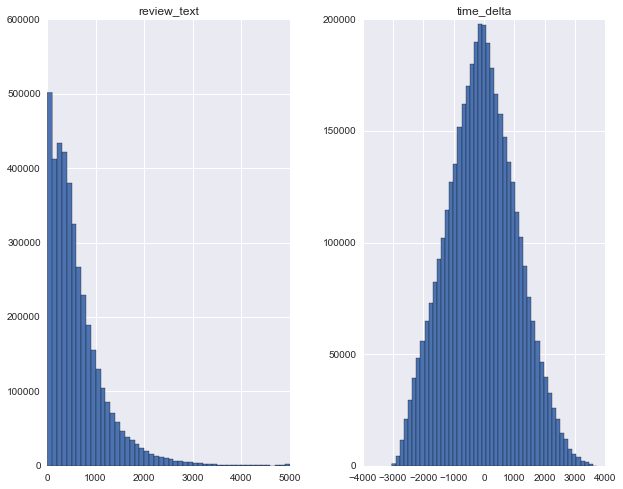

In [57]:
X.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1cd8c7390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x266939990>]], dtype=object)

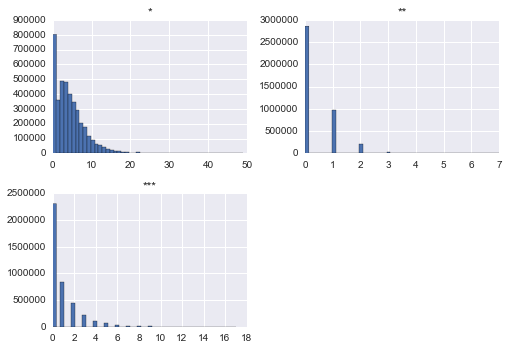

In [221]:
y.hist(bins=50)

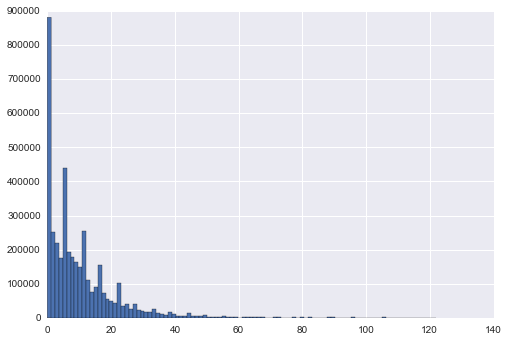

In [155]:
trans_y.hist(bins=100)

In [226]:
plt.plot(X['review_text'], y['**'], '.', alpha=.5)

NameError: name 'X' is not defined

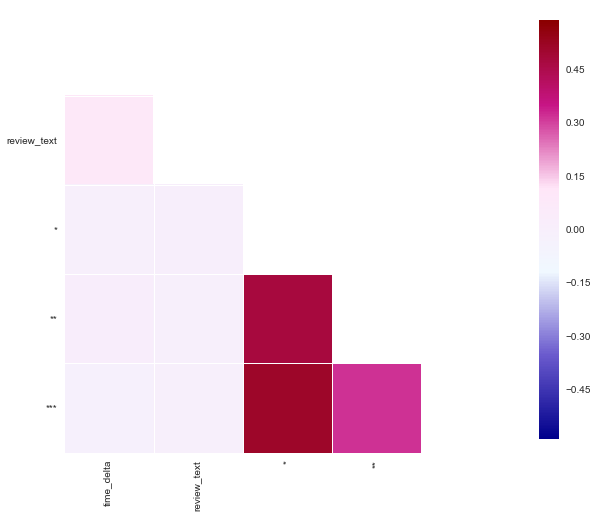

In [169]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sns.corrplot(data, annot=False, diag_names=False, cmap=cmap)
ax.grid(False);

In [9]:
import text_processors
tfidf_matrix = text_processors.load_tfidf_matrix()

In [10]:
from sklearn.cross_validation import cross_val_score
np.mean(cross_val_score(LinearRegression(), X, y, cv=3))

-0.0012309889619115388

In [37]:
scr_lst = []
for i in y.columns.tolist():
    scr_lst.append(np.mean(cross_val_score(LinearRegression(), X, y[i], cv=3)))

In [39]:
scr_lst

[-0.0012243804254890762, -0.00029430434557065066, -0.0014663357924205773]

In [53]:
m2 = LinearRegression().fit(X, y['***']).predict(X_test)
pd.DataFrame(m2).head()

,0
0,0.892943
1,0.867476
2,0.922157
3,0.896690
4,0.925227


In [18]:
X_test, y_test = pull_features(test_df)

In [19]:
predictions = model.predict(X_test)
# predictions = np.clip(predictions, 0, np.inf)
# try clipping after averaging scores also

In [20]:
pd.DataFrame(predictions).head()

,0,1,2
0,4.237228,0.388498,0.892943
1,4.201040,0.398774,0.867476
2,4.265308,0.377573,0.922157
3,4.229120,0.387848,0.896690
4,4.338169,0.371937,0.925227


In [73]:
new_submission = data_grab.get_submission().copy()
# train_labels, train_targets = data_grab.get_response()

In [188]:
temp_df = test_df.copy()
temp_df[['*','**','***']] = predictions

In [208]:
submit_scores = temp_df.groupby(['restaurant_id', 'inspection_date', 'inspection_id'])['*','**','***'].mean()

In [178]:
temp = submit_scores.reset_index().set_index('inspection_id')
indexed = temp.reindex(new_submission.index)

In [85]:
indexed.head()

,restaurant_id,inspection_date,*,**,***
id,,,,,
14916,nkOvZOBW,2014-12-17,4.271066,0.379941,0.913390
29767,WwOaAnOB,2013-12-30,4.276481,0.377986,0.918537
29338,we39kvOk,2011-04-08,4.314311,0.368737,0.940380
7219,dj3d5Xo9,2013-12-30,4.260858,0.384555,0.900714
20979,XJ3rBW3R,2008-03-31,4.316896,0.369364,0.937839


In [95]:
new_submission.iloc[:, -3:] = np.round(indexed[['*','**','***']]).astype(int)

In [96]:
new_submission.head()

,date,restaurant_id,*,**,***
id,,,,,
14916,2014-12-17,nkOvZOBW,4,0,1
29767,2013-12-30,WwOaAnOB,4,0,1
29338,2011-04-08,we39kvOk,4,0,1
7219,2013-12-30,dj3d5Xo9,4,0,1
20979,2008-03-31,XJ3rBW3R,4,0,1


In [97]:
new_submission.to_csv('predictions/ols.csv')

In [115]:
#finish plots then work on feature transfomration
# make sure that all of the submission restaurants are in the training set
# jitter plots
# make feature combining algorithm to choose which increase accuracy
# with predicted scores clipped before and after averaging
# with and without restaurant_id_number included. technically dont need it because each row corresponds with a restaurant

In [205]:
train_df.shape

(4071065, 142)